### Documentation:
#### Data Set:5.outlier


### Data Description:
The dataset consists of three columns and 500 rows which includes two feature columns and one label column.
Features columns are in the form of float and continuous values ranges from [-1.318500 to 2.181372] and [-3.046143 to 2.759355] and the means are at [-0.065366 and -0.025148].
Whereas label is in the form discrete numerical float values that inclueds [0.0 and 1.0]. 50% of the data consists of 0 and rest consists of 1 as labels.
There are zero duplicates and no null values consists in the dataset.
Pattern that is formed by the input features is linear separatering. That means a liner line is separating 0 label and 1 label.

### Importing Libraries: The required libraries are imported at the beginning of the code.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset:
The code reads a CSV file using Pandas, assuming the file is located at"C:\\Users\\dell\\Downloads\\1.ushape.csv". The dataset is stored in the DataFrame df.

In [68]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\1.ushape.csv",header = None)
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


#### Gives the dimensions of the dataset (number of rows, number of columns).


In [69]:
df.shape

(100, 3)

In [70]:
df[[0,1]]


,0,1
0,0.031595,0.986988
1,2.115098,-0.046244
2,0.882490,-0.075756
3,-0.055144,-0.037332
4,0.829545,-0.539321
...,...,...
95,1.699453,0.587720
96,0.218623,-0.652521
97,0.952914,-0.419766
98,-1.318500,0.423112


#### Provides information about the dataset, including the data types of each column and the number of non-null values.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column. 

In [71]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,0.500420,0.228701,0.500000
std,0.891044,0.592885,0.502519
min,-1.318500,-1.035702,0.000000
25%,-0.140330,-0.203260,0.000000
50%,0.470678,0.188660,0.500000
75%,1.112008,0.658448,1.000000
max,2.181372,1.571899,1.000000


In [72]:
df.duplicated().sum()

0

In [73]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [74]:
df[2].value_counts()

0.0    50
1.0    50
Name: 2, dtype: int64

### Data Visualization:
A scatter plot is created using Seaborn to visualize the data points, where the x-axis represents df[0], the y-axis represents df[1], and the color of the points is determined by df[2]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

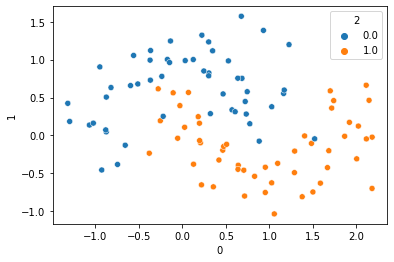

In [75]:
sns.scatterplot(df[0],df[1],hue = df[2])

### Train-Test Split:
The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features (x_train, x_test) consist of columns 0 and 1 from the DataFrame, while the target variables (y_train, y_test) correspond to column 2. The testing set size is set to 10% of the total dataset.

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

### Data Preprocessing:
The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)

### Importing necessary libraries:
- TensorFlow and Keras are libraries.
- Sequential is a linear stack of neural network layers.
- Dense represents a fully connected layer.

In [77]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

### Model Architecture:

- The model is defined as a sequential model, which means the layers are stacked sequentially.
- The first layer is a dense layer with 4 units/neurons, ReLU activation function, and He uniform kernel initializer. It takes input of dimension 2.
- A dropout layer is added after the first dense layer with a dropout rate of 0.2. Dropout is a regularization technique used to prevent overfitting.
- The second layer is another dense layer with 3 units/neurons, ReLU activation function, and He uniform kernel initializer.
- Another dropout layer is added after the second dense layer with a dropout rate of 0.2.
- The last layer is a dense layer with 1 unit/neuron and sigmoid activation function. It outputs the binary classification prediction (0 or 1).

In [51]:
model = Sequential()
model.add(Dense(4, activation="relu", kernel_initializer='he_uniform', input_dim=2))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(3, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(1, activation="sigmoid"))

### Model Summary:

The summary function displays a summary of the model, including the layer types, output shapes, and the number of parameters.

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_10 (Dense)            (None, 3)                 15        
                                                                 
 dropout_4 (Dropout)         (None, 3)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Compilation:

- The model is compiled with the Adam optimizer, which is an optimization algorithm commonly used for training neural networks.
- The loss function used is binary cross-entropy, suitable for binary classification problems.
- The accuracy metric is specified to evaluate the model's performance during training.

In [55]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

### Training:

- The model is trained using the fit function, passing the training data (x_trainf and y_train) with a batch size of 20.
- The training is performed for 80 epochs, which means the entire training dataset is passed through the model 80 times.
- The validation split of 0.2 indicates that 20% of the training data will be used as validation data to monitor the model's performance during training.
- The training history is stored in the history object.

In [56]:
history=model.fit(x_trainf,y_train,batch_size=20,epochs=80,validation_split=0.2)

Epoch 1/80
4/4 [==============================] - 1s 38ms/step - loss: 0.6018 - accuracy: 0.5972 - val_loss: 0.5831 - val_accuracy: 0.4444
Epoch 2/80
4/4 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.5278 - val_loss: 0.5812 - val_accuracy: 0.5000
Epoch 3/80
4/4 [==============================] - 0s 6ms/step - loss: 0.5814 - accuracy: 0.6111 - val_loss: 0.5791 - val_accuracy: 0.5556
Epoch 4/80
4/4 [==============================] - 0s 6ms/step - loss: 0.6233 - accuracy: 0.5139 - val_loss: 0.5770 - val_accuracy: 0.6111
Epoch 5/80
4/4 [==============================] - 0s 6ms/step - loss: 0.6308 - accuracy: 0.4167 - val_loss: 0.5748 - val_accuracy: 0.6111
Epoch 6/80
4/4 [==============================] - 0s 7ms/step - loss: 0.6120 - accuracy: 0.5556 - val_loss: 0.5725 - val_accuracy: 0.6667
Epoch 7/80
4/4 [==============================] - 0s 6ms/step - loss: 0.5982 - accuracy: 0.5417 - val_loss: 0.5706 - val_accuracy: 0.6667
Epoch 8/80
4/4 [=================

Epoch 60/80
4/4 [==============================] - 0s 6ms/step - loss: 0.5321 - accuracy: 0.7222 - val_loss: 0.5203 - val_accuracy: 0.8333
Epoch 61/80
4/4 [==============================] - 0s 6ms/step - loss: 0.5202 - accuracy: 0.7639 - val_loss: 0.5199 - val_accuracy: 0.8333
Epoch 62/80
4/4 [==============================] - 0s 6ms/step - loss: 0.5380 - accuracy: 0.6806 - val_loss: 0.5188 - val_accuracy: 0.8333
Epoch 63/80
4/4 [==============================] - 0s 6ms/step - loss: 0.5003 - accuracy: 0.7361 - val_loss: 0.5171 - val_accuracy: 0.8333
Epoch 64/80
4/4 [==============================] - 0s 6ms/step - loss: 0.5360 - accuracy: 0.7222 - val_loss: 0.5152 - val_accuracy: 0.8333
Epoch 65/80
4/4 [==============================] - 0s 6ms/step - loss: 0.5584 - accuracy: 0.7222 - val_loss: 0.5133 - val_accuracy: 0.8333
Epoch 66/80
4/4 [==============================] - 0s 6ms/step - loss: 0.5542 - accuracy: 0.6528 - val_loss: 0.5113 - val_accuracy: 0.8333
Epoch 67/80
4/4 [==========

### Prediction and Evaluation:

- The model is used to predict the classes for the test data (x_testf) using the predict function. The predictions are stored in y_cap.
- A threshold of 0.5 is applied to the predicted probabilities to obtain binary predictions (y_capf) by setting values above 0.5 to 1 and values below or equal to 0.5 to 0.


In [58]:
y_cap=model.predict(x_testf)

In [59]:
y_capf=np.where(y_cap>0.5,1,0)

#### The accuracy of the model's predictions is calculated using the accuracy_score function from the scikit-learn library, comparing the true labels (y_test) with the predicted labels (y_capf).

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.9

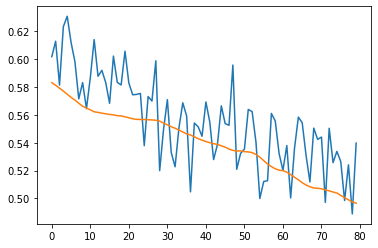

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Visualization:


- The plot_decision_regions function from the mlxtend library is used to visualize the decision boundaries of the model. It plots the decision regions based on the features in columns 0 and 1 of the DataFrame df and the corresponding class labels in column 2.
- Plot_decision_regions are made: one with the training data (df[[0,1]].values, df[2].values.astype(int)) and another with the test data (x_testf, y_test.values.astype(int)).

In [62]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

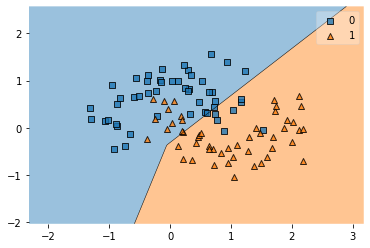

In [63]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

##### - The decision boundaries of the model are visualized using the mlxtend library..

<AxesSubplot:>

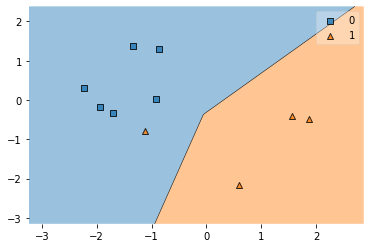

In [65]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)